[데이터 설명]
1. age: 나이
2. sex: 성별
3. cp: chest pain type
4. trestbps: 휴지기때의 혈압
5. chol: serum cholestoral
6. fbs: Fasting blood sugar
7. restecg: 휴지기때의 심전도 결과
8. thalach: 최대 심박수
9. exang: exercise induced angina
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: Slope of the peak exercise ST segment
12. ca: Number of major vessels(0-3) colored by flourosopy
13. thal: Thalassemia(지중해성빈혈) 3,6,9의 수치로 존재
14. target: 1,0 <- 심장별 발생 여부

- 13개의 항목들이 어떻게 묶이는지 확인

- 13개의 설명 변수를 이용하여 hear disease의 관련된 data analysis 수행
- PCA를 사용하여 dimension reduction을 수행
- 몇 개의 Component를 설정할지, (elbow point) 결정
- 각각의 component에서 가장 큰 Feature weight가 무엇인지 알아본다

[분석 과정]

1. 간단한 data preprocessing 과정을 수행
    - 결측치 확인
    - 상관계수 확인
2. PCA의 Components 개수를 임의로 설정한 후 Variance에 대한 그래프를 그린다.
3. Elbow point를 찾아서 PCA component의 개수를 구해준다.
4. pca.components_ 명령어로 각 feature들의 weight를 구한 후
5. Bar plot으로 어떤 feature가 어느 정도의 영향력을 보이는지 알아본다.

# PCA 살펴보기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Heart Disease Data

In [2]:
hd = pd.read_csv("C:/data/heart.csv")
print("데이터 행: {}, 열: {}".format(hd.shape[0],hd.shape[1])) 
hd.head(5)

데이터 행: 303, 열: 14


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


결측치 확인

In [3]:
hd.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

상관계수 구하기

<AxesSubplot:>

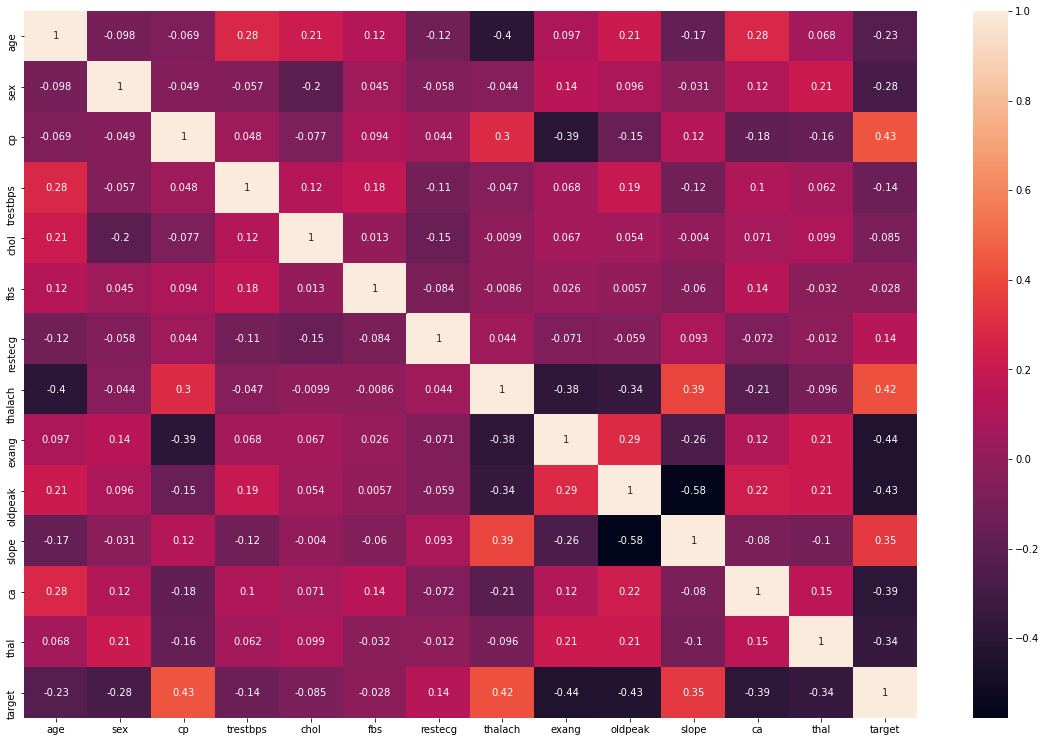

In [4]:
corr = hd.corr()

plt.figure(figsize=(20,13))
sns.heatmap(corr, annot=True)

보기 불편하니 좀 더 직관적으로 들어오게 다른 plot을 그려보자

In [5]:
hd_drop_target = hd.drop('target',axis=1)
hd_target = hd['target'] # label 값

<AxesSubplot:>

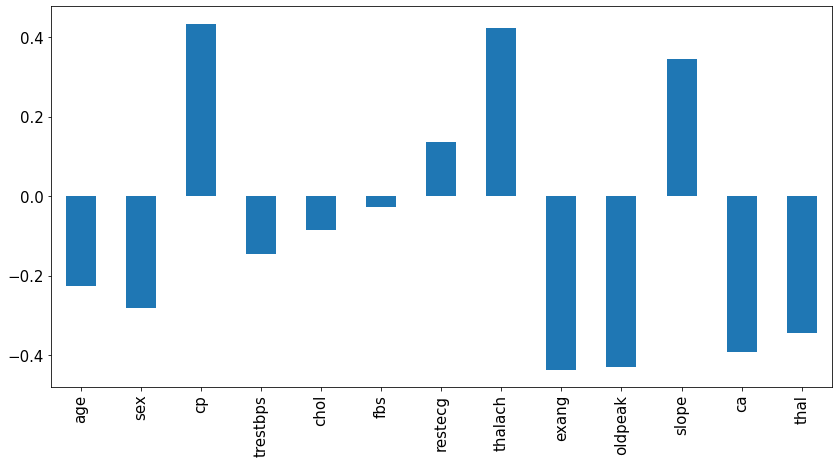

In [6]:
#bar chart
hd_drop_target.corrwith(hd_target).plot.bar(figsize=(14,7),fontsize=15)

- y 값에 영향을 주는 요인
- 가장 큰 영향을 주는 feature가 0.58로 상당히 적음
- 따라서, pca를 통해 차원 축소 필요

In [8]:
from sklearn.decomposition import PCA
# component 수는 임의로 정한다.
# 먼저 elbow point를 알아보기 위한 plot을 그려준 후 다시 pca를 설정하도록 함
n = 5
pca = PCA(n_components=n)
pca_result = pca.fit_transform(hd_drop_target.values)

elbow point는 component가 2일때로 정함


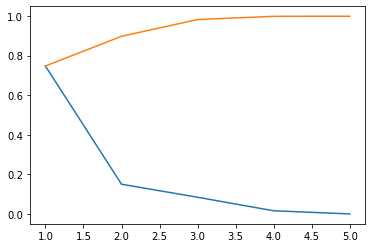

In [12]:
# explained_variance_ratio_ = Percentage of variance explained by each of the selected components
x = [i for i in range(1,n+1)]

plt.plot(x, pca.explained_variance_ratio_)
plt.plot(x, np.cumsum(pca.explained_variance_ratio_))
print('elbow point는 component가 2일때로 정함')

PCA Component 2

In [13]:
# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(hd_drop_target.values)

In [15]:
# pca.components_ 수만큼 주성분 번호 할당
dimensions = ['Components {}'.format(i) for i in range(len(pca.components_))]
dimensions

['Components 0', 'Components 1']

In [17]:
pca.explained_variance_ratio_

array([0.7475642 , 0.15037022])

- 첫 번째 주성분의 variance: 0.7475642
- 두 번째 주성분의 variance: 0.15037022

DataFrame으로 정리해보자

In [20]:
# 주성분 DataFrame으로 정리
# np.round(pca.components_, 4) => 소숫점 4자리
components = pd.DataFrame(np.round(pca.components_,4), columns=list(hd_drop_target.keys()))
components.index = dimensions
components

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
Components 0,0.0395,-0.0018,-0.0015,0.0476,0.9981,0.0001,-0.0016,-0.0074,0.0006,0.0013,-0.0001,0.0015,0.0012
Components 1,0.1822,0.0008,-0.0125,0.1038,-0.0194,0.0005,-0.0012,-0.9772,0.0075,0.0179,-0.0104,0.0101,0.0026


각 components를 구성하는 weight 값

[Text(0, 0, 'Components 0'), Text(1, 0, 'Components 1')]

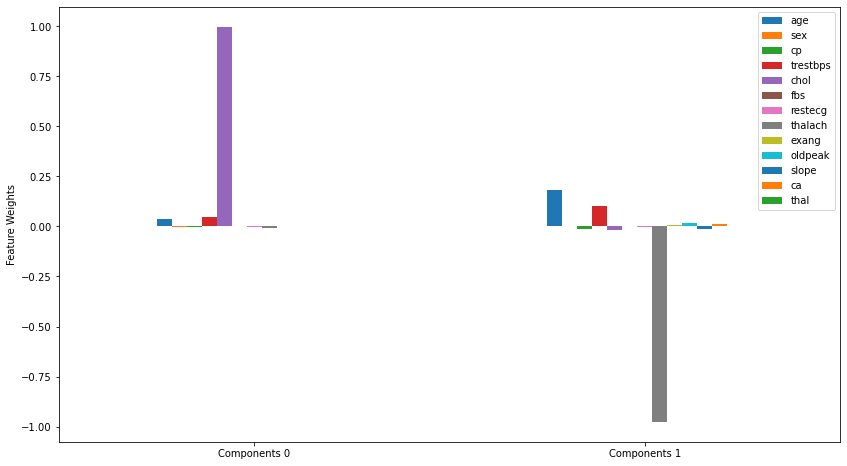

In [21]:
# 주성분들을 plot을 그리기 위한 fig 설정
_, ax = plt.subplots(figsize=(14,8))

# Plot 그리기
components.plot(ax=ax, kind='bar') # bar를 해주지 않으면 각 feature들이 연결되어서 그려짐, bar를 해주면 히스토그램처럼 그려짐
ax.set_ylabel('Feature Weights')
ax.set_xticklabels(dimensions, rotation=0) # rotation=0 => 글자를 가로로

In [22]:
# pca 주성분 분산
ratios = pca.explained_variance_ratio_.reshape(len(pca.components_),1)
variance_ratios = pd.DataFrame(np.round(ratios,4), columns=['PCA 주성분 분산'])
variance_ratios.index = dimensions 

variance_ratios

,PCA 주성분 분산
Components 0,0.7476
Components 1,0.1504
